In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn import datasets
import numpy as np

In [3]:
digits = datasets.load_digits()
print("What is information of digits: ", digits.keys())

What is information of digits:  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X = digits.data
Y = digits.target
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

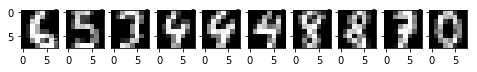

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.ion()

imgSize = (8,8)
fig, ax = plt.subplots(1,10, figsize=(8,1))
for i in range(10):
    img = np.reshape(X_train[i], imgSize)
    ax[i].imshow(img, cmap='gray')

In [9]:
def getReconstructedImage(rbm, x, weight):
    x_data = np.reshape(x, (64,1))
    
    # Weight의 크기는 10x64, Input은 64x1
    output = np.matmul(weight, x_data)
    
    # 이제 Reconstruction을 해 봅시다
    # weight.T: 64*10, output은 10x1
    reconstrunction = np.matmul(weight.T, output)
    
    return np.ravel(reconstrunction)

In [10]:
rbm = BernoulliRBM(random_state=0, verbose=True)
rbm.learning_rate = 0.06
rbm.n_iter = 1
rbm.n_components = 10
rbm.batch_size = 10

rbm.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.39, time = 0.03s


BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=10, n_iter=1,
       random_state=0, verbose=True)

In [12]:
print ("우리가 만든Visible node와 연결된 Bias값: ", rbm.intercept_visible_)
print ("Input이 64개 니까, bias값도? ", np.size(rbm.intercept_visible_))

우리가 만든Visible node와 연결된 Bias값:  [-0.744      -0.63428994 -0.36339263 -0.15587906 -0.18073651 -0.33001974
 -0.5316474  -0.73760048 -0.72900105 -0.52350674 -0.19937441 -0.17704068
 -0.19310641 -0.28861706 -0.49805972 -0.72950057 -0.7620003  -0.45295514
 -0.19165823 -0.2911843  -0.28936331 -0.32397289 -0.48338099 -0.74721495
 -0.7740006  -0.45269522 -0.22797713 -0.25144044 -0.27887276 -0.21682896
 -0.45846616 -0.7860018  -0.702      -0.44254101 -0.23740077 -0.28974492
 -0.19964187 -0.17461882 -0.38493145 -0.756      -0.73650049 -0.48054115
 -0.30227343 -0.31132799 -0.26000818 -0.2699207  -0.42585087 -0.74657213
 -0.77625012 -0.59769888 -0.24152556 -0.2575502  -0.19305001 -0.27704753
 -0.36440507 -0.75230864 -0.73457203 -0.58695549 -0.33628669 -0.13246926
 -0.16584344 -0.29412979 -0.44684594 -0.72675108]
Input이 64개 니까, bias값도?  64
